## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [70]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

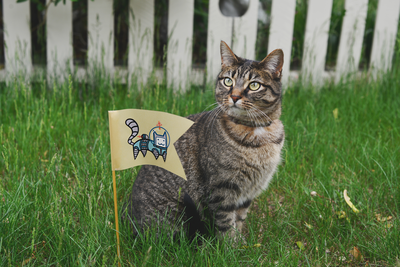

In [71]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [72]:
import numpy as np

cat = np.array(cat_img)

In [73]:
cat

array([[[ 29,  29,  27],
        [ 36,  38,  40],
        [ 86,  88,  89],
        ..., 
        [200, 200, 198],
        [199, 199, 197],
        [194, 194, 194]],

       [[ 29,  30,  27],
        [ 34,  38,  39],
        [ 84,  86,  88],
        ..., 
        [200, 200, 198],
        [200, 200, 198],
        [193, 193, 192]],

       [[ 28,  32,  26],
        [ 33,  38,  38],
        [ 80,  84,  84],
        ..., 
        [200, 200, 198],
        [199, 199, 197],
        [191, 192, 191]],

       ..., 
       [[ 50,  86,  35],
        [ 78, 119,  80],
        [ 62,  99,  51],
        ..., 
        [103, 118,  66],
        [128, 134,  86],
        [138, 144,  95]],

       [[ 59,  98,  45],
        [ 53,  97,  43],
        [ 46,  73,  40],
        ..., 
        [106, 120,  64],
        [125, 132,  82],
        [133, 137,  87]],

       [[ 76, 116,  61],
        [ 46,  92,  29],
        [ 62,  85,  62],
        ..., 
        [101, 115,  61],
        [102, 115,  66],
        [113, 127,

To convert an array back to an image (for display) use the function below:

In [74]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [75]:
print(np.ndim(cat))
print(np.shape(cat))

3
(267, 400, 3)


##### The cat array is 3 dimensions. The first dimension is the height of the photo in pixels. The second dimension is the length of the foto in pixels. And the third dimension is the length of the array (3) that determines the color of each pixel.

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

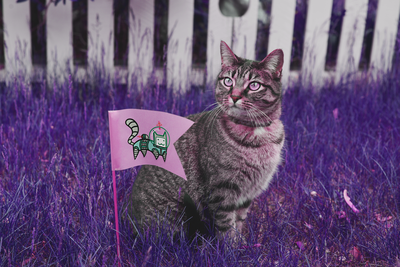

In [76]:
dog = cat.copy()

temp = dog[:,:,1].copy()
dog[:,:,1] = dog[:,:,2]
dog[:,:,2] = temp

as_image(dog)        

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

##### If I didn't copy cat before I manipulated it, I would have manipulated the original. Then, if I made a mistake, I would not be able to reference the array for the original image, or at least not very easily. 

In [77]:
dog1 = dog.copy()
dog2 = cat.copy() 

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

In [78]:
def flip_blue(image):
    temp = image[:,range(0,400),2].copy()
    image[:,range(399,-1,-1),2] = temp
    return(as_image(image))

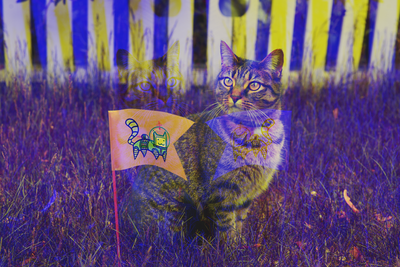

In [79]:
flip_blue(dog1)

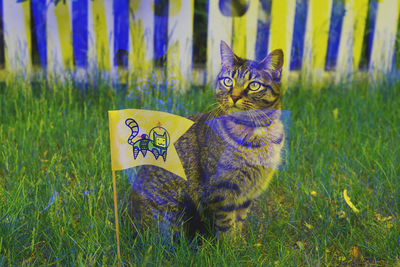

In [80]:
flip_blue(dog2)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [81]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [82]:
def X_to_XVq_Vqt(X,q,reducetype = 1):
    U, D, Vt = np.linalg.svd(X)
    ide = (U@(U.T))[:][:q]         # other method: "ide = (np.eye(np.shape(U)[0]))[:][:q]"
    Dq = D[:q]
    DmatQ = ((ide.T)@np.diag(Dq))
    Vqt = Vt[:q][:]
    XVq = U@DmatQ
    if reducetype == 1:
        Vqt = Vqt.astype('float16')
        XVq = XVq.astype('float16')
    print(np.shape(XVq),np.shape(Vqt))
    return XVq, Vqt

In [83]:
def XVq_Vqt_to_X(XVq,Vqt):
    X_hat = XVq@Vqt
    return X_hat

(267, 20) (20, 400)


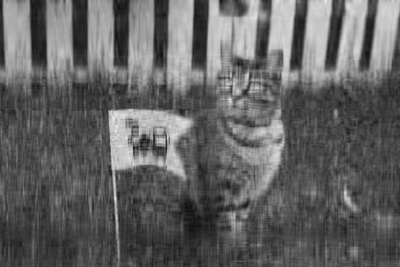

In [84]:
result = X_to_XVq_Vqt(cat[:,:,0],20)
res_XVq = result[0]
res_Vqt = result[1]

copycat = XVq_Vqt_to_X(res_XVq,res_Vqt)
as_image(copycat)

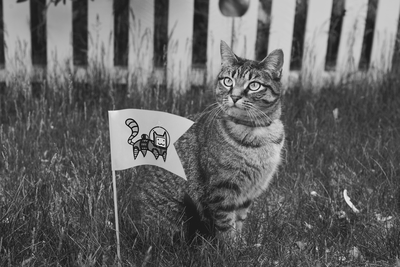

In [85]:
catfull = cat[:,:,0]
as_image(catfull)

##### The lowest value q could have and still produce a recognisable image of a cat would probably be around 20. You get much lower than 20 and your cat starts to look questionable. 

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [86]:
result10 = X_to_XVq_Vqt(catfull,10)

print(result10[0].nbytes + result10[1].nbytes)
print(catfull.nbytes)
reduced = result10[0].nbytes + result10[1].nbytes
print((reduced/float(catfull.nbytes))*100,"%")

(267, 10) (10, 400)
13340
106800
12.49063670411985 %


##### The original photo is 106800 bytes. The compressed 10-term photo is 13340 bytes. That is 12.5% of the original. I had to change the dtype 

## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [87]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [88]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [89]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j  -1.+0.j]
 [ -1.+0.j   0.+0.j]] 
x approx is:
 [[ 1.33333333  1.83333333  1.83333333]
 [ 1.66666667  2.16666667  2.16666667]]


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [90]:
def X_to_fft_CD(X,r,reducetype = 1):
    x_coef = np.fft.rfft2(X)
    x_coef[-r:, -r:] = 0
    x_dims = X.shape
    if reducetype == 1:
        x_coef = x_coef.astype('complex64')
    return x_coef, x_dims

In [91]:
def fft_CD_to_Xhat(x_coef, x_dims):
    X_hat = np.fft.irfft2(x_coef, x_dims)
    return X_hat

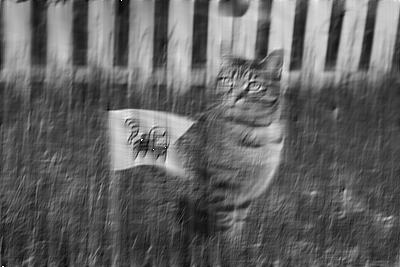

In [92]:
step1 = X_to_fft_CD(catfull,187)
step2 = fft_CD_to_Xhat(step1[0],step1[1])
as_image(step2)

##### The image above is what you get when you zero away more 187^2 terms. Taking away more than 190^2 makes it really smudged. 

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [93]:
result20_32 = X_to_XVq_Vqt(catfull,20,0)
step1_32 = X_to_fft_CD(catfull,190)
print(step1_32[1])
print(result20_32[0].nbytes + result20_32[1].nbytes)
print(step1_32[0].nbytes)

(267, 20) (20, 400)
(267, 400)
106720
429336


The FFT method did not appear to change the dimensions of the image at all. The SVD method did make a change, since it has to turn into two matrices as part of its process. Personally, I prefer the kind of distortion from the FFT method. The contouring and highlighting makes it look kind of cool. 

For this comparison, I took my resolution thresholds (q=20 for SVD, and r=190 for FFT) and calculated the total bytes each would take up in storage. The SVD method is about four times more effective at dimension reduction even with a head start. Basically, I got this ratio after doing two steps to give FFT the fairest shot possible: 
(1) neglecting to reduce the dtype of the matrices the SVD method stores from 'float64' (default) to 'float16.'
(2) reducing the dtype of the matrix the FFT method stores from 'complex128' (default) to 'complex64.'
Essentially, what this did was make all terms contributing to the byte-counts in both methods 64-bit terms. 